
# ADS Foundations Project

# Ideological Effects of Gerrymandering


**Partner: Max Feinglass**

**Carlyle Davis**

**11/15/2015 **


In [2]:
import pandas as pd
from sklearn import decomposition
from sklearn.cluster import KMeans
import contextlib
import numpy as np
import matplotlib.pyplot as pl
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
###
#
# Update the Path below to the local folder containing the files 
# from this Dropbox Link: http://bit.ly/1X0ViNe
#
###

path = '/Users/carlyle/Documents/ADS/Foundations/data/'

In [4]:
#http://stackoverflow.com/questions/2891790/pretty-printing-of-numpy-array
#set a function to manage the print options of specific arrays
@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    yield 
    np.set_printoptions(**original)



In [5]:
df = pd.read_csv(path + 'gerry_features_norm.csv')
print(df.columns)

Index(['Unnamed: 0', 'max_unemp', 'max_race', 'max_jobs', 'max_ed', 'ks_inc',
       'CookScore', 'spaceindx', 'GEO_id2'],
      dtype='object')


In [6]:
#df[['max_unemp', 'max_race', 'max_jobs', 'max_ed', 'ks_inc','CookScore', 'spaceindx']].plot(figsize=(12,8));

#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(df[['max_unemp', 'max_race', 'max_jobs', 'max_ed', 'ks_inc','CookScore', 'spaceindx']], figsize=(25,25));

In [7]:
###
#
# PCA Analysis on Our Data
#
###

data= df.as_matrix(columns = None)
#delte the index and the Geo id2 column
data = data[:,1:-1]
print(data.shape)

principles = 3

#pca = decomposition.PCA(n_components = 'mle')
pca = decomposition.PCA(n_components = principles)
pca.fit(data)
X = pca.transform(data)
#printout of the variance explained by each column
with printoptions(precision=3, suppress=True):
    print('PCA WITH FEATURES NORMALIZED:\n', pca.explained_variance_ratio_) 

#extra documentation on PCA: http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

(435, 7)
PCA WITH FEATURES NORMALIZED:
 [ 0.364  0.164  0.124]


In [8]:
#get the weights of each of the features by vector space
#http://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ration-in-pca-with-sklearn
i = np.identity(data.shape[1])
print (i)
#unformatted version of the PCA weights
coef = pca.transform(i)
#print(coef)

#formatted version of the PCA weights
# weights = pd.DataFrame(coef, columns=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6'],
#                       index=['max_unemp', 'max_race', 'max_jobs', 'max_ed', 'ks_inc','CookScore', 'spaceindx'])

weights = pd.DataFrame(coef, columns=['PC-1', 'PC-2', 'PC-3'],
                       index=['max_unemp', 'max_race', 'max_jobs', 'max_ed', 'ks_inc','CookScore', 'spaceindx'])


print('PCA PARAMETERS:\n', pca.get_params(),'\n')

pd.options.display.float_format = '{:,.3f}'.format
print('PCA WEIGHTS: \n', weights)
#can also take the abs to see magnitude a bit easier: weights.abs()


[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]]
PCA PARAMETERS:
 {'copy': True, 'n_components': 3, 'whiten': False} 

PCA WEIGHTS: 
             PC-1   PC-2   PC-3
max_unemp -0.662 -0.563 -0.496
max_race   0.439 -0.639  0.274
max_jobs  -0.223 -0.429 -0.344
max_ed    -0.044 -0.132  0.131
ks_inc    -0.215 -0.735 -0.108
CookScore -0.793 -0.450  0.717
spaceindx -0.389 -0.797  0.185


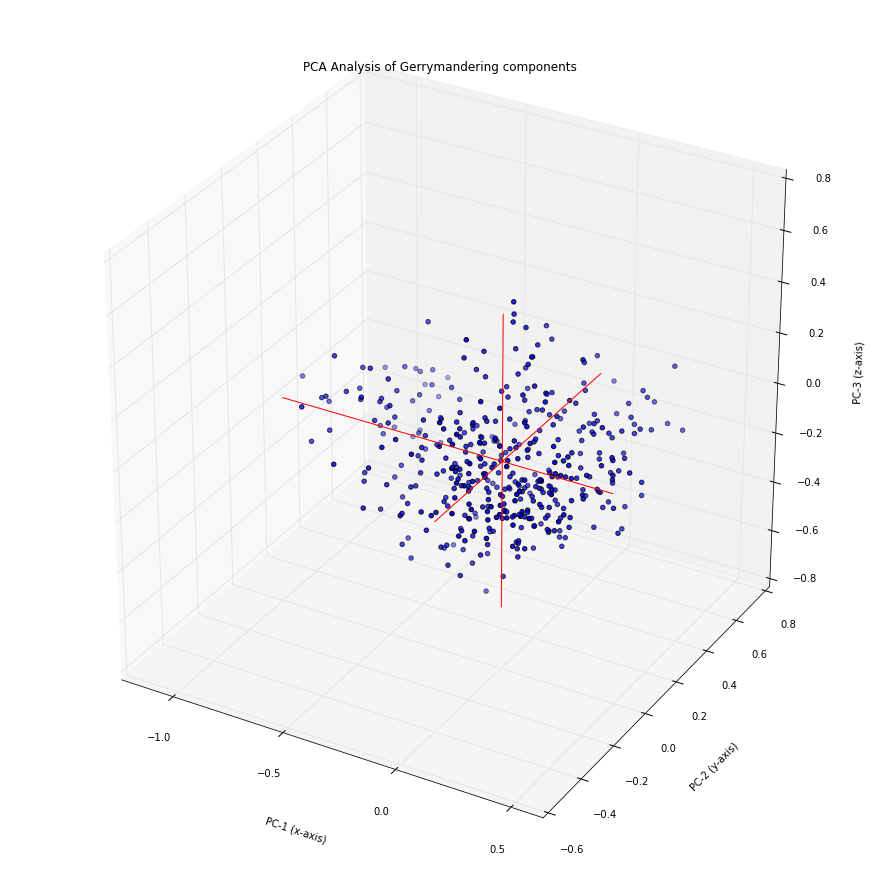

In [9]:
###
#
# Graphing the PCA
# source: http://blog.nextgenetics.net/?e=42
#
###

from mpl_toolkits.mplot3d import Axes3D

fig1 = pl.figure(figsize = (12,12)) # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData = [X[:, 0], X[:, 1], X[:, 2]] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') # make a scatter plot of blue dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.

yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.

zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
ax.set_xlabel("PC-1 (x-axis)") 
ax.set_ylabel("PC-2 (y-axis)")
ax.set_zlabel("PC-3 (z-axis)")
ax.set_title("PCA Analysis of Gerrymandering components")



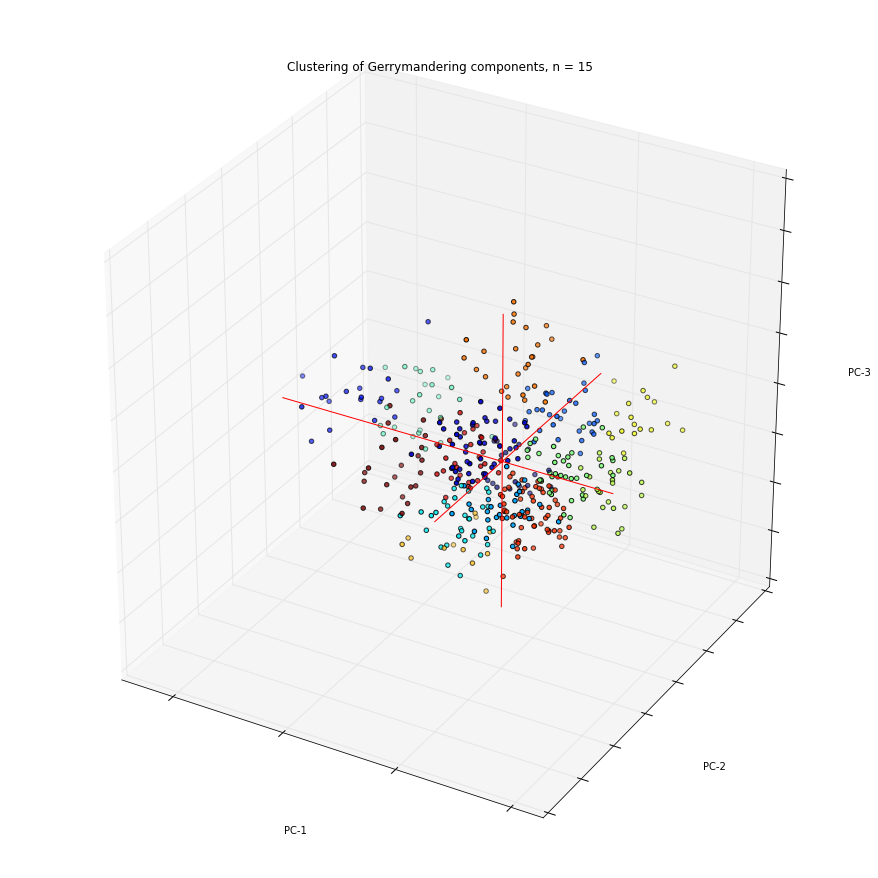

In [10]:
###
#
# K Means Clustering on PCA
#
###

fig2 = pl.figure(figsize = (12,12)) # Make a plotting figure
ax = Axes3D(fig2)

#number of clusters
def rule_of_thumb(x):
    #number of clusters by the rule of thumb, as taken from wikipedia.
    #rounds up after finds cluster
    clusters = int(math.ceil(np.sqrt(x/2)))
    return clusters

clusters = rule_of_thumb(len(X))

Kmeans_est = KMeans(n_clusters=clusters, n_init = 1000)

Kmeans_est.fit(X)
Kmeans_labels = Kmeans_est.labels_

ax.scatter(pltData[0], pltData[1], pltData[2], c=Kmeans_labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.

yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.

zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.


ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')
ax.set_title("Clustering of Gerrymandering components, n = {0}".format(clusters))


In [11]:
#can affix the 'labels' array to the original dataset to see what teh labels are from a clustering of the PCA components
#print(Kmeans_labels)

In [12]:
#add PCA Kmeans labels to DF
df['Kmeans_PCA_{0}'.format(clusters)] = Kmeans_labels

In [13]:
###
#
# try to compare a clustering off of the original data to the clustering of the PCAs
# to verify that the PCA clusters are more logical than the raw clusters
#
###

# Kmeans_est.fit(data)
# Kmeans_raw_labels = Kmeans_est.labels_
# df['Kmeans_labels_raw'] = Kmeans_raw_labels
# df.head()

In [14]:
###
#
# Trying to create a score that preserves the PCA clusters found above, which is essentially 
# just saying to take the first PC-1 as the indicator of the most effective weights on the 
# feature space.... see below where the weight for PC-1 is 1, which makes sense.
#
###

principles = 1
pca = decomposition.PCA(n_components = principles)
pca.fit(X)
flatten = pca.transform(X)
with printoptions(precision=3, suppress=True):
    print('PCA WITH FEATURES NORMALIZED:\n', pca.explained_variance_ratio_) 
i2 = np.identity(X.shape[1])
#unformatted version of the PCA weights
coef = pca.transform(i2)

weights2 = pd.DataFrame(coef, columns=['flattened'],
                       index=['PC-1', 'PC-2', 'PC-3'])

print('PCA PARAMETERS:\n', pca.get_params(),'\n')

print('PCA WEIGHTS: \n', weights2)

PCA WITH FEATURES NORMALIZED:
 [ 0.558]
PCA PARAMETERS:
 {'copy': True, 'n_components': 1, 'whiten': False} 

PCA WEIGHTS: 
       flattened
PC-1      1.000
PC-2     -0.000
PC-3     -0.000


For n_clusters = 5 The average silhouette_score is : 0.27935408893
For n_clusters = 6 The average silhouette_score is : 0.288038441879
For n_clusters = 7 The average silhouette_score is : 0.282278949471
For n_clusters = 8 The average silhouette_score is : 0.257097566198
For n_clusters = 9 The average silhouette_score is : 0.264344020024
For n_clusters = 10 The average silhouette_score is : 0.262742379423
For n_clusters = 11 The average silhouette_score is : 0.263318794337
For n_clusters = 12 The average silhouette_score is : 0.278725616251
For n_clusters = 13 The average silhouette_score is : 0.280708180811
For n_clusters = 14 The average silhouette_score is : 0.284565006304
For n_clusters = 15 The average silhouette_score is : 0.275886436247
For n_clusters = 16 The average silhouette_score is : 0.260260899552
For n_clusters = 17 The average silhouette_score is : 0.265998506536
For n_clusters = 18 The average silhouette_score is : 0.260027606364
For n_clusters = 19 The average silhouet

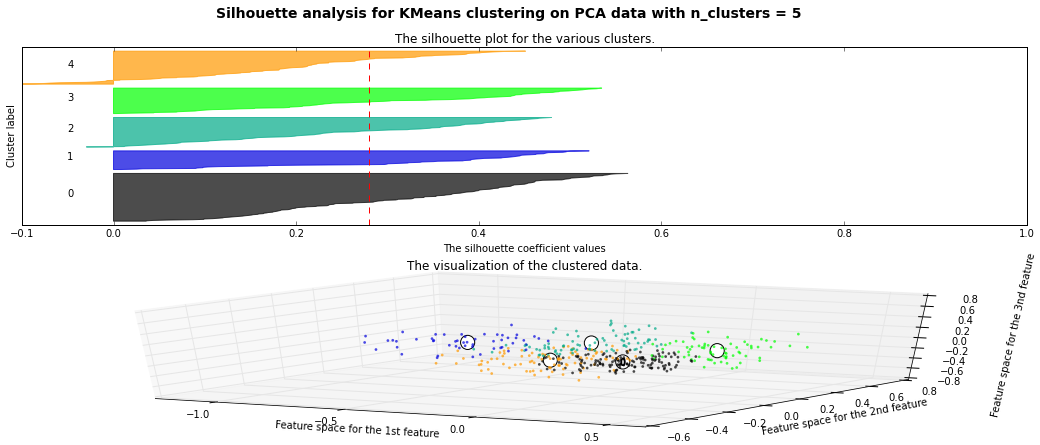

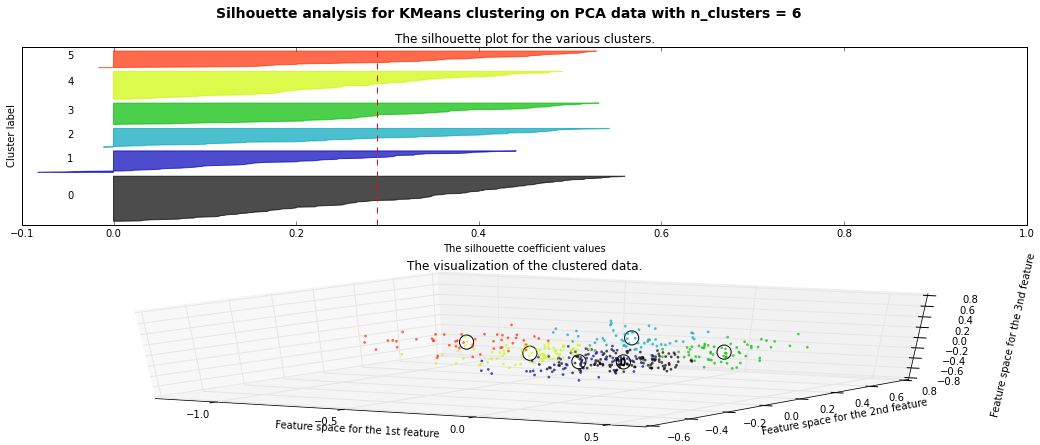

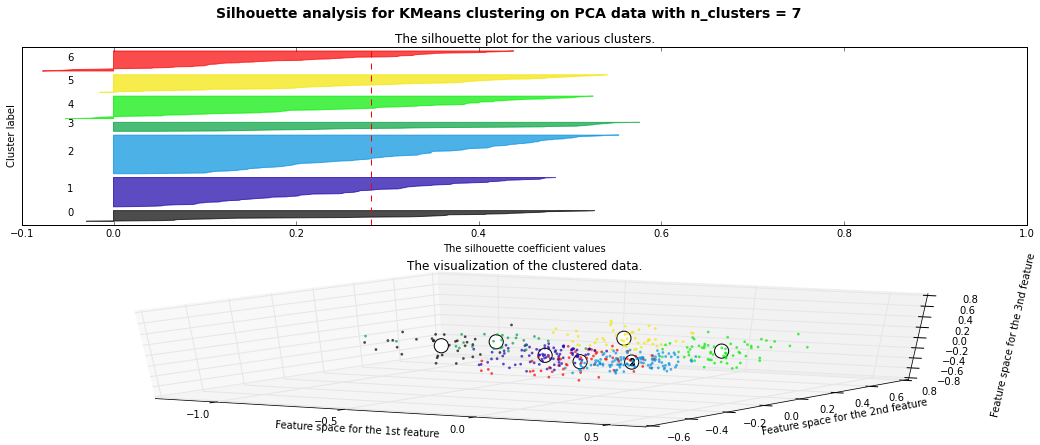

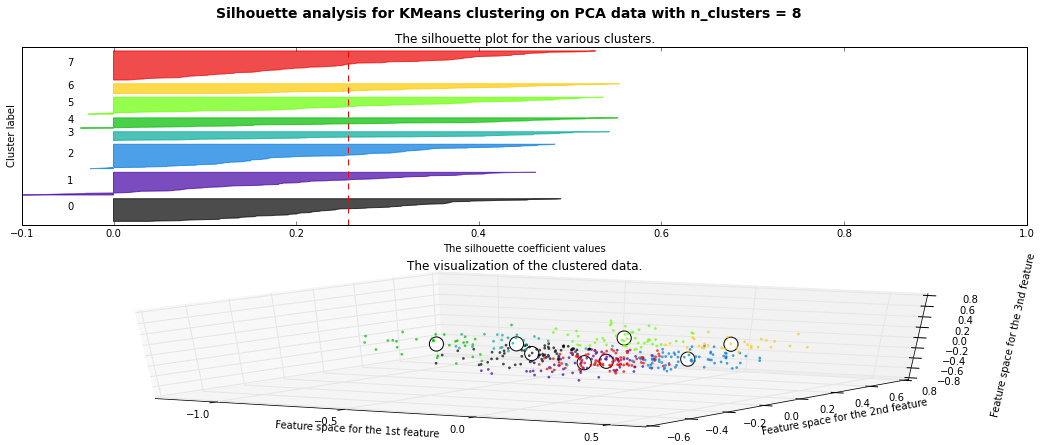

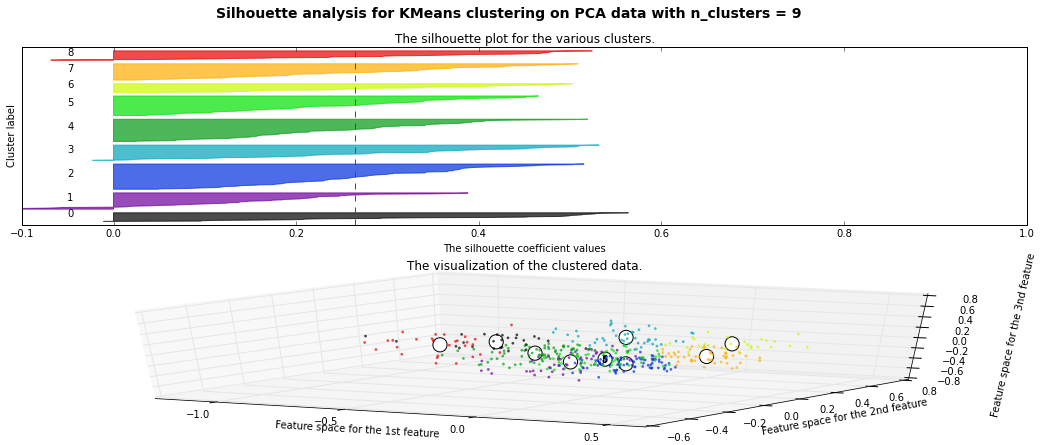

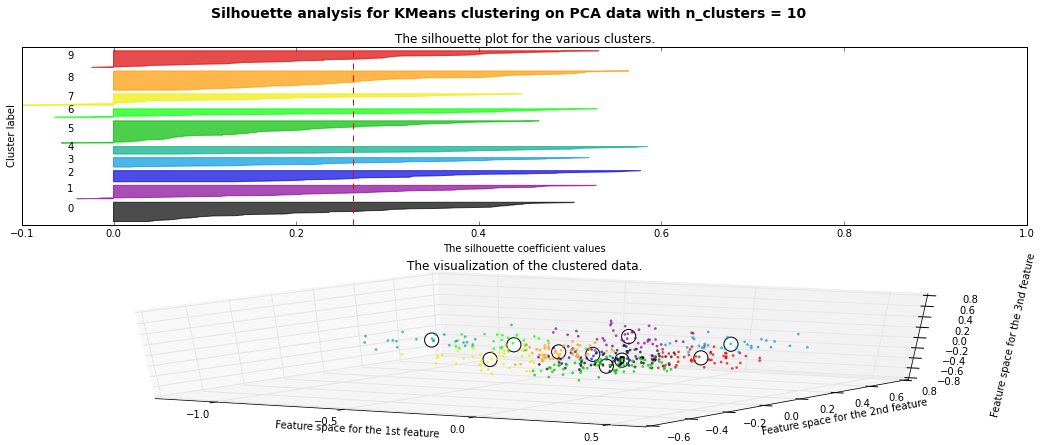

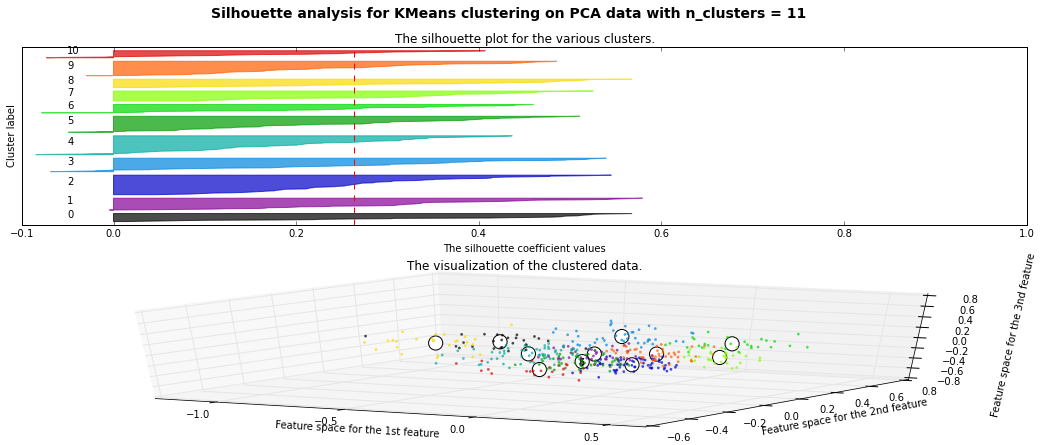

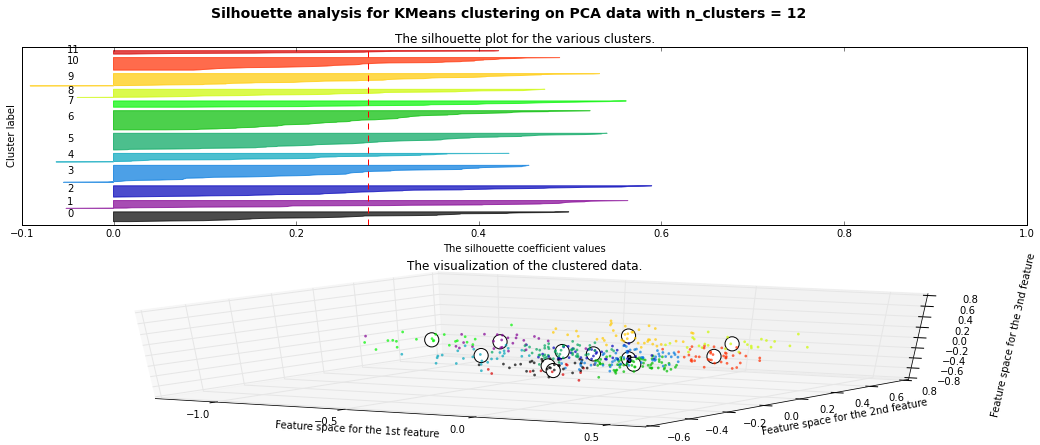

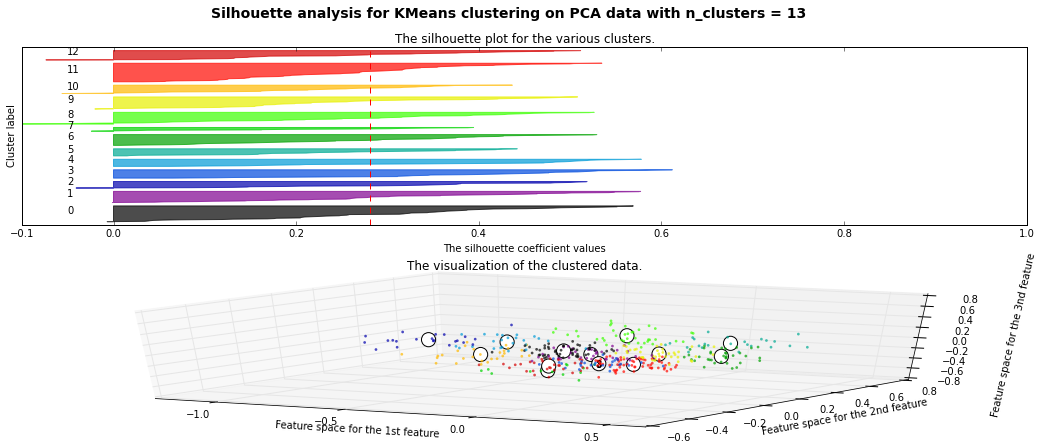

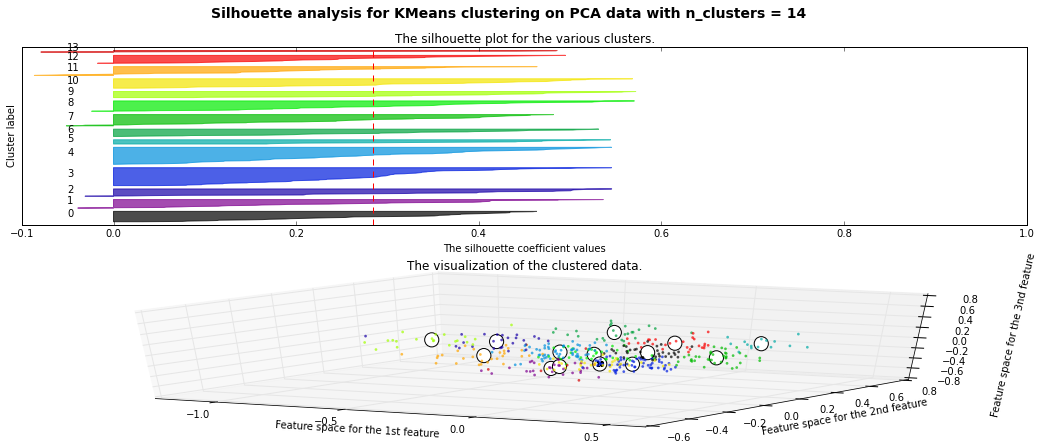

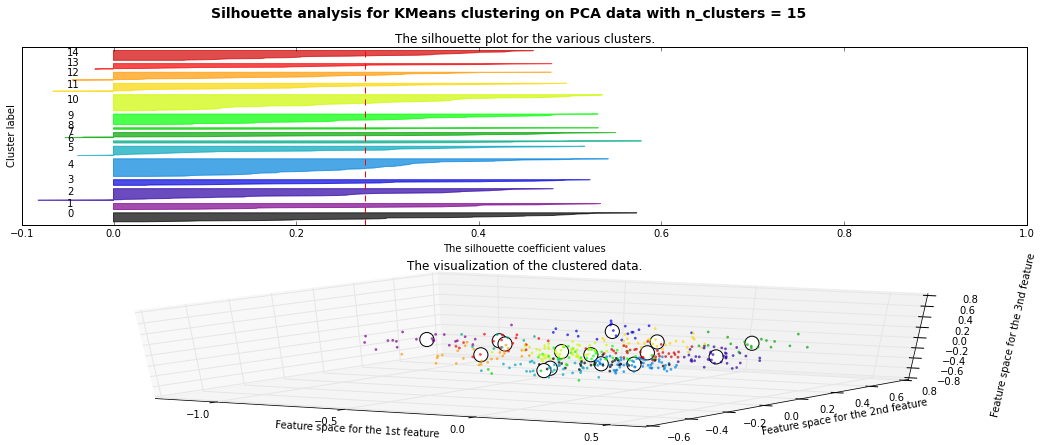

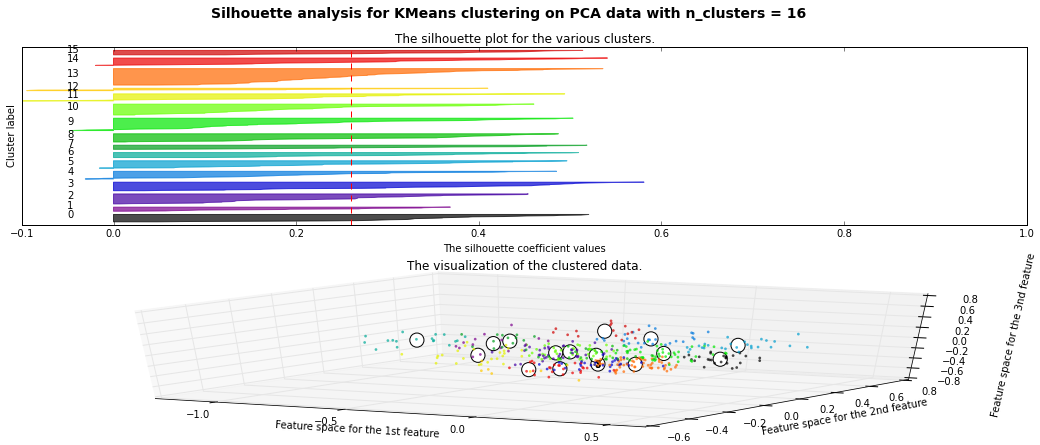

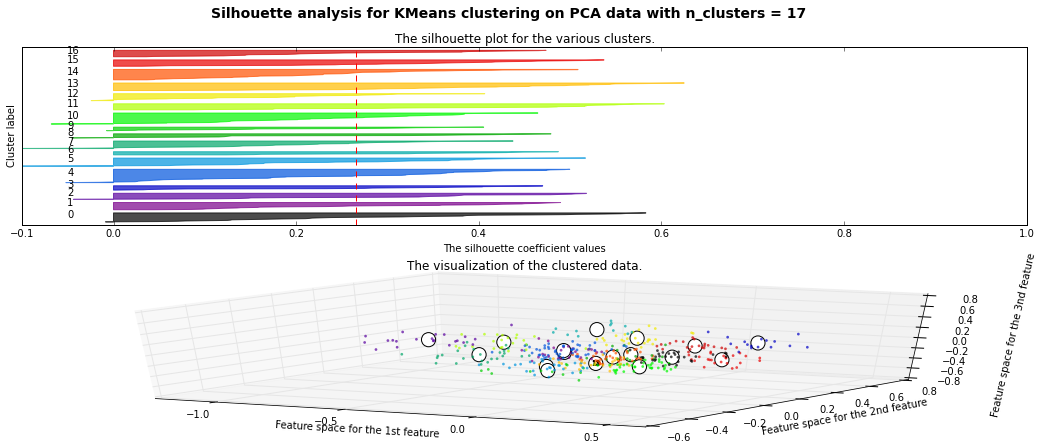

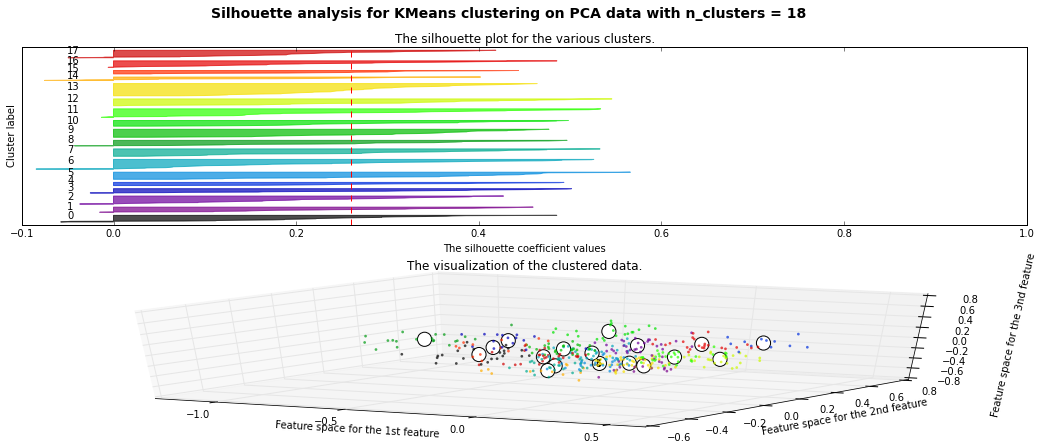

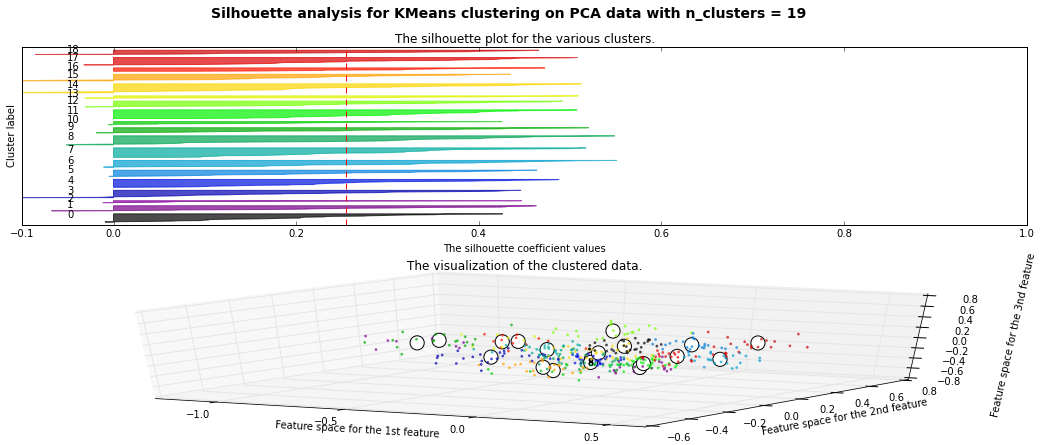

In [15]:
###
#
# Sillouette Analysis for Optimal CLustering Size
# should be between 13 and 15 (like the rule of thumb).  
# source: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#
###

range_n_clusters = list(range(5,20))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = pl.figure(figsize = (8,4))#figsize=pl.figaspect(2.))
    ax1 = fig.add_subplot(2, 1, 1)
    
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    ax2 = fig.add_subplot(2, 1, 2, projection='3d')
    
    
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
       #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors)
    
    ax2.scatter(X[:, 0], X[:, 1], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)


    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    
    ax2.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.set_zlabel("Feature space for the 3nd feature")


    plt.suptitle(("Silhouette analysis for KMeans clustering on PCA data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [16]:
###
#
# Use Information from Silhouette Analysis to Cluster Appropriately
#14 clusters is the optimal scoring, so going to append this to the df
#
###

clusters = 14

Kmeans_est = KMeans(n_clusters=clusters, n_init = 1000)

Kmeans_est.fit(X)
Kmeans_labels = Kmeans_est.labels_
df['Kmeans_PCA_{0}'.format(clusters)] = Kmeans_labels

In [17]:
###
#
# Export of Final Data
#
###

#add PC_1 score to output
df['PC_1'] = X[:,0]
#clean up df
df = df.drop('Unnamed: 0', 1)
df_final = df.set_index('GEO_id2')
df_final = df.reset_index()

#add in final geo labels
geo = pd.read_csv(path + 'geoid.csv', index_col= 'GEO.id2')
geo.index.name = 'GEO_id2'
geo.columns = ['GEO_display_label']
geo = geo.reset_index()

#merge with final scores, print to csv
df_geo = pd.merge(df_final, geo, how='inner', on='GEO_id2', sort=True, copy=True)
df_geo = df_geo.drop('index', 1)
new_final = df_geo.set_index('GEO_id2')
new_final.to_csv('final_scores_index.csv')